In [1]:
import numpy as np
import pandas as pd
# import qgrid as qg

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set_style("darkgrid")

from ase.formula import Formula

plt.style.use("../plots.mplstyle")

In [2]:
df = pd.read_csv("list_final.csv")
len(df), df.columns

(118,
 Index(['space_group', 'n_formula', 'material', 'n_primitive', 'mp_id',
        'sigmaA_300', 'sigmaA_500', 'sigmaA_700', 'source', 'kappa_exp',
        'bandgap', 'kappa_bte', 'ref_exp', 'ref_bte', 'kappa_aiGK', 'comment',
        'use'],
       dtype='object'))

In [3]:
df.describe()

,space_group,n_formula,n_primitive,sigmaA_300,sigmaA_500,sigmaA_700,bandgap
count,118.000000,118.000000,115.000000,116.00000,99.000000,99.000000,118.000000
mean,192.610169,2.957627,4.521739,0.31096,0.402727,0.471313,2.576393
std,46.890313,1.081263,5.116790,0.08213,0.106059,0.118921,2.019763
min,56.000000,2.000000,2.000000,0.17000,0.220000,0.260000,0.116772
25%,166.000000,2.000000,2.000000,0.25000,0.320000,0.380000,1.048993
50%,218.500000,3.000000,3.000000,0.29000,0.370000,0.440000,1.867945
75%,225.000000,4.000000,4.000000,0.37250,0.500000,0.590000,3.810048
max,225.000000,5.000000,40.000000,0.55000,0.640000,0.720000,8.965041


In [4]:
def n_elements(name: str):
    return len(Formula(name).count())

In [5]:
df["n_elements"] = df.material.apply(n_elements)

In [6]:
# qg.show_grid(df)

In [7]:
classes = {
    "orthorombic": (16, 74),
    "tetragonal": (75, 142),
    "trigonal": (143, 167),
    "hexagonal": (168, 194),
    "cubic": (195, 230),
}
classes = {
    "cubic": (195, 230),
    "hexagonal": (168, 194),
    "trigonal": (143, 167),
    "tetragonal": (75, 142),
    "orthorombic": (16, 74),
}

In [8]:
def autopie(counts, labels=None, colors=None, ax=plt, autopct=True):
    if autopct:
        f = lambda c: int(np.round(c / 100.0 * sum(counts), 0))
    else:
        f = None
    return ax.pie(
        counts,
        labels=labels,
        colors=colors,
        autopct=f,
        pctdistance=0.75,
        textprops={"fontsize": 18},
        wedgeprops={"width": 0.9999},  # hotfix
    )

          cubic materials: 75
      hexagonal materials: 7
       trigonal materials: 18
     tetragonal materials: 11
    orthorombic materials: 7


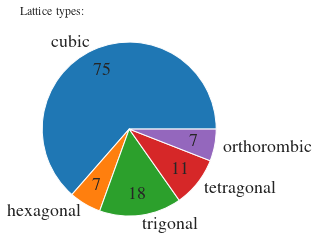

In [9]:
sns.set_palette("tab10")

counts = []
labels = []

for c in classes:
    labels.append(c)
    d = df[df.space_group.between(*classes[c])]
    count = len(d)
    counts.append(count)
    print(f"{c:>15} materials: {count}")

pie = autopie(counts, labels)

plt.title("Lattice types:", loc="left")
plt.savefig("pie.pdf", bbox_inches="tight")

In [10]:
def get_class_index(sg):
    """return index of the class of spacegroup for color coding"""
    for ii, c in enumerate(classes):
        l, u = classes[c]
        if sg >= l and sg <= u:
            return ii

            225 materials: 48
            221 materials: 11
            216 materials: 15
            206 materials: 1
            186 materials: 7
            166 materials: 16
            164 materials: 1
            160 materials: 1
            122 materials: 11
             62 materials: 5
             61 materials: 1
             56 materials: 1


12

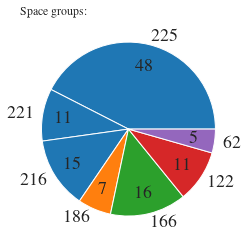

In [11]:
counts_sg = []
labels_sg = []
colors_sg = []

for c in df.space_group.unique()[::-1]:

    d = df[df.space_group == c]
    count = len(d)
    print(f"{c:>15} materials: {count}")
    if count == 1:
        continue
    counts_sg.append(count)
    labels_sg.append(c)
    class_index = get_class_index(c)
    colors_sg.append(f"C{class_index}")

fig, ax = plt.subplots()

autopie(counts_sg, labels=labels_sg, colors=colors_sg, ax=ax)
ax.set_title("Space groups:", loc="left")
fig.savefig("pie2.pdf", bbox_inches="tight")

len(df.space_group.unique())

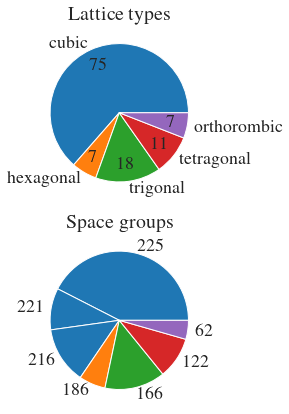

In [12]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 7), nrows=2, sharex=True)

autopie(counts, labels, ax=ax1)
autopie(counts_sg, labels=labels_sg, colors=colors_sg, ax=ax2, autopct=False)

kw = {"loc": "center", "fontsize": 20}
ax1.set_title("Lattice types", **kw)
ax2.set_title("Space groups", **kw)

fig.savefig("pies.pdf", bbox_inches="tight")

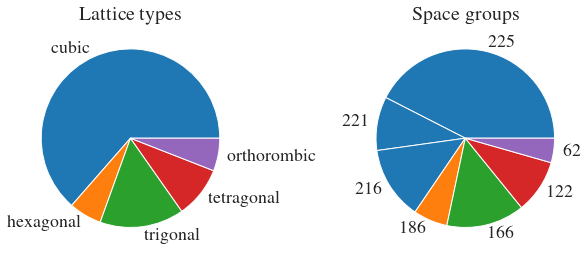

In [13]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 20), ncols=2, sharey=True)
fig.subplots_adjust(wspace=0.5)


autopie(counts, labels, ax=ax1, autopct=False)
autopie(counts_sg, labels=labels_sg, colors=colors_sg, ax=ax2, autopct=False)

kw = {"loc": "center", "fontsize": 20}
ax1.set_title("Lattice types", **kw)
ax2.set_title("Space groups", **kw)

fig.savefig("pies_horizontal.pdf", bbox_inches="tight")

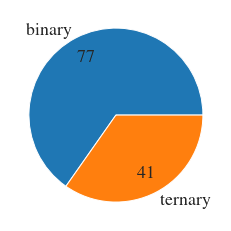

In [14]:
fig, ax = plt.subplots()

d2 = df[df.n_elements == 2]
d3 = df[df.n_elements == 3]

counts = [len(d2), len(d3)]
labels = ["binary", "ternary"]

autopie(counts, labels, ax=ax)

fig.savefig("pie3.pdf", bbox_inches="tight")

In [15]:
# count elements
names = []
count_O = 0
for name in df.material:
    formula = Formula(name)
    names.extend(list(formula.count().keys()))
    if "O" in formula:
        count_O += 1

len(np.unique(names)), count_O

(36, 15)

In [16]:
# number experimental references
len(df.ref_exp.dropna())

45

In [17]:
# number theoretical references
len(df.ref_bte.dropna())

28

In [18]:
df.sigmaA_300

0      0.281398
1      0.310000
2      0.350000
3      0.250000
4           NaN
         ...   
113    0.330000
114    0.310000
115    0.400000
116    0.380000
117    0.300000
Name: sigmaA_300, Length: 118, dtype: float64

count    116.00000
mean       0.31096
std        0.08213
min        0.17000
25%        0.25000
50%        0.29000
75%        0.37250
max        0.55000
Name: sigmaA_300, dtype: float64

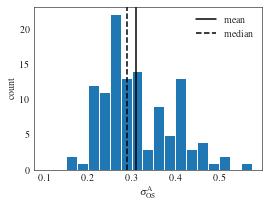

In [19]:
fig, ax = plt.subplots(figsize=(4.1, 3))

s = df.sigmaA_300
# sns.distplot(df.sigmaA_300)
s.hist(ax=ax, density=False, bins=np.arange(0.1, 0.6, 0.025))
# s.plot.kde(ax=ax, label='_nolegend_')
ax.axvline(s.mean(), c="k", label="mean")
ax.axvline(s.median(), c="k", ls="--", label="median")
ax.legend(frameon=False)

ax.set_xlabel(r"$\sigma^{\rm A}_{\rm OS}$")
ax.set_ylabel("count")

s.describe()

From Ramprasad: 41
From Toberer: 3
From Springer: 4
From Roekeghem: 9
From ICSD_exp: 55
From Seko: 2
From AAPL: 4


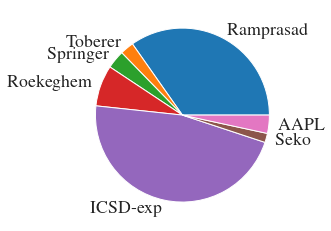

In [20]:
# sources

counts = []
labels = []

for source in df.source.unique():
    d = df[df.source == source]
    print(f"From {source}: {len(d)}")
    counts.append(len(d))
    labels.append(source.replace("_", "-"))

pie = autopie(counts, labels, autopct=False)